<a href="https://colab.research.google.com/github/Miyamoto-my/fontJudge_python/blob/main/fontJudge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 前処理

画像の種類

* ゴシック体
* 教科書体
* 明朝体
* 行書体
* 丸文字

## 画像を正方形にする

In [ ]:
import cv2
import numpy as np

def createImg(img_contraction):
  tmp = img_contraction[:, :]
  height, width = img_contraction.shape[:2]

  ## 長編を正方形の一片の長さにする
  if(height > width):
    size = height
    limit = width
  else:
    size = width
    limit = height

  start = int((size - limit) / 2)
  fin = int((size + limit) / 2)

  ## 新しい正方形を作成
  new_img = cv2.resize(np.full((1, 1, 3), 255, np.uint8), (size, size))

  ## 新しく作った正方形の中心に画像（長方形）を貼り付けする
  if(size == height):
    new_img[:, start:fin] = tmp
  else:
    new_img[start:fin, :] = tmp

  return new_img

In [ ]:
import os
import cv2

file_path = "/content/drive/MyDrive/data/img_original"          ## 画像が格納されたファイル
img_path_array = []

files = os.listdir(file_path)

for file in files:
  img = cv2.imread(file_path + "/" + file)
  out_path = "/content/drive/MyDrive/data/img_square/" + file   ## 画像の保存先のファイル
  cv2.imwrite(out_path, out_img)

## 画像のサイズ統一と色反転

In [ ]:
import os
from PIL import Image, ImageOps

file_path = "/content/drive/MyDrive/data/img_square"      ## インポートする画像が格納されたファイルパス
file_out_path = "/content/drive/MyDrive/data/img_resize"  ## 画像の保存先のファイルパス
img_path_array = []

files = os.listdir(file_path)

for file in files:
  img_path = file_path + "/" + file
  out_path = file_out_path + "/" + file

  img = Image.open(img_path)      ## 画像を開ける
  out_img = ImageOps.invert(img)  ## 画像の色を反転
  out_img = out_img.resize((100, 100), Image.LANCZOS) ## 画像サイズを統一
  out_img.save(out_path)          ## 画像を保存

## 余白追加

In [ ]:
import os
import cv2

file_path = "/content/drive/MyDrive/data/img_resize"        ## インポートする画像が格納されたファイルパス
file_out_path = "/content/drive/MyDrive/data/img_addMargin" ## 画像の保存先のファイルパス
img_path_array = []

files = os.listdir(file_path)

for file in files:
  img_path = file_path + "/" + file
  out_path = file_out_path + "/" + file 
  
  img = cv2.imread(img_path)
  out_img = cv2.copyMakeBorder(img, 25, 25, 25, 25, cv2.BORDER_CONSTANT, value=[0,0,0]) ## 余白の追加
  
  cv2.imwrite(out_path, out_img)

# 学習データの作成

変換表

* ゴシック体「あ」：0 ゴシック体「い」：1 ゴシック体「う」：2 ゴシック体「え」：3 ゴシック体「お」：4
* 教科書体　「あ」：5 教科書体　「い」：6 教科書体　「う」：7 教科書体　「え」：8 教科書体　「お」：9
* 明朝体　　「あ」：10 明朝体　　「い」：11 明朝体　　「う」：12 明朝体　　「え」：13 明朝体　　「お」：14
* 行書体　　「あ」：15 行書体　　「い」：16 行書体　　「う」：17 行書体　　「え」：18 行書体　　「お」：19
* 丸文字体　「あ」：20 丸文字体　「い」：21 丸文字体　「う」：22 丸文字体　「え」：23 丸文字体　「お」：24



In [ ]:
def label_config(name):
  """ labelを設定する
  Parameters:
  ----------
  name : string
    画像の名前
  Return:
  ----------
  label : int
  """

  label = 0       ## 画像の答え
  name = name.replace(".jpg", "")

  if name == 'Gothic(1)':
    label = 0
  elif name == 'Gothic(2)':
    label = 1
  elif name == 'Gothic(3)':
    label = 2
  elif name == 'Gothic(4)':
    label = 3
  elif name == 'Gothic(5)':
    label = 4
  elif name == 'Kyoukasyo(1)':
    label = 5
  elif name == 'Kyoukasyo(2)':
    label = 6
  elif name == 'Kyoukasyo(3)':
    label = 7
  elif name == 'Kyoukasyo(4)':
    label = 8
  elif name == 'Kyoukasyo(5)':
    label = 9
  elif name == 'Minch(1)':
    label = 10
  elif name == 'Minch(2)':
    label = 11
  elif name == 'Minch(3)':
    label = 12
  elif name == 'Minch(4)':
    label = 13
  elif name == 'Minch(5)':
    label = 14
  elif name == 'gyousyo(1)':
    label = 15
  elif name == 'gyousyo(2)':
    label = 16
  elif name == 'gyousyo(3)':
    label = 17
  elif name == 'gyousyo(4)':
    label = 18
  elif name == 'gyousyo(5)':
    label = 19
  elif name == 'maru(1)':
    label = 20
  elif name == 'maru(2)':
    label = 21
  elif name == 'maru(3)':
    label = 22
  elif name == 'maru(4)':
    label = 23
  elif name == 'maru(5)':
    label = 24

  return label

In [ ]:
import csv
import os
from PIL import Image
import numpy as np

file_path = "/content/drive/MyDrive/data/img_addMargin" ## 画像が格納されたファイルパス
train_path = "/content/drive/MyDrive/data/train.csv"    ## 学習データの保存先のファイルパス

files = os.listdir(file_path)

with open(train_path, "w", encoding="utf-8") as f:
  writer = csv.writer(f)

  for file in files:
    img_path = file_path + "/" + file

    img = Image.open(img_path)                ## 画像を開ける
    img = img.resize((80, 80), Image.LANCZOS) ## 画像サイズを「80 x 80」に変更

    label_num = label_config(file)            ## label(画像の答え)

    for i in range(-5, 6):                    ## 画像を5度ずつ回転させる
      out_img = img.rotate((i * 5), resample=Image.BICUBIC)

      array = np.array(out_img, dtype='uint8')
      array = np.ravel(array)                 ## 数字を一列にする (3次元配列を1次元配列にする)
      array = array[::3]                      ## 白黒画像なのでRGB値の最初の値だけ保存する
      array = np.append(label_num, array)     ## 配列の1つ目の要素に画像の答えを、2つ目以降に画像のRGB値を格納する

      writer.writerow(array)                  ## csvに書き込み

# 学習モデルの作成

In [ ]:
import numpy as np
import csv

train_path = "/content/drive/MyDrive/data/train.csv"  ## 学習データのパス

with open(train_path, "r", encoding="utf-8") as file: ## csv形式のファイルを読み込む
  csvreader = csv.reader(file)
  mnist_list = []
  for row in csvreader:
    mnist_list.append(row)

array = np.array(mnist_list)

## 学習データのデータ
data = np.array(array[:,1:], dtype='uint8')
data = data.reshape(275, 80, 80)      ## CSVで保存する際、一次元配列に変換していたので、元の三次元配列へと戻す

## 学習データのラベル
label = np.array(array[:,:1], dtype='uint8')
label = label.reshape(275)            ## CSVで保存する際、一次元配列に変換していたので、元の三次元配列へと戻す

In [ ]:
print(array, len(array), len(array[0]))

[['5' '0' '0' ... '0' '0' '0']
 ['5' '0' '0' ... '0' '0' '0']
 ['5' '0' '0' ... '0' '0' '0']
 ...
 ['9' '0' '0' ... '0' '0' '0']
 ['9' '0' '0' ... '0' '0' '0']
 ['9' '0' '0' ... '0' '0' '0']] 275 6401


In [ ]:
import tensorflow as tf     ## 深層学習を行うためのライブラリをインポートします

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(80, 80)),  ## 入力層
    tf.keras.layers.Dropout(0.25),                  ## ドロップアウト
    tf.keras.layers.Dense(400, activation='relu'),  ## 隠れ層 ("400"となっているのがニューロン数、"activation"で活性化関数を指定)
    tf.keras.layers.Dropout(0.25),                  ## ドロップアウト
    tf.keras.layers.Dense(25, activation="softmax") ## 出力層
])

model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
## optimizer...最適化, loss...損失関数(交差エントロピー), metrics...尺度(精度),

print(model.summary())                              ## モデルの要約を出力

In [ ]:
model.fit(data, label, epochs=3)
## data...学習データのデータ(RGB値), label...学習データの答え, epochs...学習を繰り返す回数

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


9/9 [==============================] - 1s 23ms/step - loss: 196.4926 - accuracy: 0.2000
Epoch 2/3
9/9 [==============================] - 0s 21ms/step - loss: 35.5903 - accuracy: 0.7345
Epoch 3/3
9/9 [==============================] - 0s 21ms/step - loss: 9.6726 - accuracy: 0.9091


# 手書き文字を作成する

http://fontjudge.html.xdomain.jp/

In [ ]:
## Google Colaboratory に手書き文字のファイルをアップロードする
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [ ]:
import cv2
import numpy as np

img_path = "/content/canvas.png"  ## アップロードした画像ファイルパス
img = cv2.imread(img_path)

img = cv2.bitwise_not(img)        ## 画像の白黒反転
img = cv2.resize(img, dsize=(400, 80))
img = img.ravel()                 ## 平坦化
img = img[2::3]                   ## 2から始めることで、黄色（枠の部分）を消す
img = img.reshape(80, 400)        ## reshapeで一次元配列を二次元配列にする

img_array = []

for i in range(5):                ## 文字ごとに切り分ける
  start_num = i * 80
  buf_array = []
  for j in range(80):
    buf_array.append(img[j][start_num:(start_num + 80)])

  img_array.append(buf_array)

img_array = np.array(img_array)

# 予測・判定

In [ ]:
## ラベルと画像の名前の変換
class_names = [
  'gothic_a', 'gothic_i', 'gothic_u', 'gothic_e', 'gothic_o', 
  'gyousyo_a', 'gyousyo_i', 'gyousyo_u', 'gyousyo_e', 'gyousyo_o', 
  'kyoukasyo_a', 'kyoukasyo_i', 'kyoukasyo_u', 'kyoukasyo_e', 'kyoukasyo_o', 
  'maru_a', 'maru_i', 'maru_u', 'maru_e', 'maru_o',
  'minch_a', 'minch_i', 'minch_u', 'minch_e', 'minch_o'
]

def plot_img(i, predictions_array, img_array):
  img = img_array[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],100*np.max(predictions_array)), color='blue')

-------------------- 判定結果 --------------------

〝minch_e〟と判定しました。



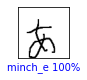

-------------------- 判定結果 --------------------

〝kyoukasyo_i〟と判定しました。



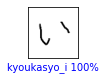

-------------------- 判定結果 --------------------

〝kyoukasyo_u〟と判定しました。



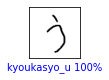

-------------------- 判定結果 --------------------

〝minch_e〟と判定しました。



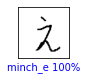

-------------------- 判定結果 --------------------

〝maru_o〟と判定しました。



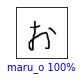

In [ ]:
import matplotlib.pyplot as plt       ## 描写するライブラリ

predict = model.predict(img_array)    ## 手書き文字の画像をモデルを用いて予測・判定させる
for i in range(5):                    ## 画像を1つずつ読み込む
  print("-------------------- 判定結果 --------------------\n")
  print("〝" + class_names[np.argmax(predict[i])] + "〟と判定しました。\n")

  plt.figure(figsize=(2,1))
  plt.subplot(1,2,1)
  plot_img(i, predict[i], img_array)
  plt.show()